In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('clothing.csv', index_col = 0 )

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
data.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [4]:
missing_pct = data.isnull().mean() * 100
print(missing_pct)

Clothing ID                 0.000000
Age                         0.000000
Title                      16.222430
Review Text                 3.597888
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059610
Department Name             0.059610
Class Name                  0.059610
dtype: float64


In [5]:
data[['Review Text' ]] = data[['Review Text' ]].fillna('')
data[['Title' ]] = data[['Title' ]].fillna('')

In [6]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


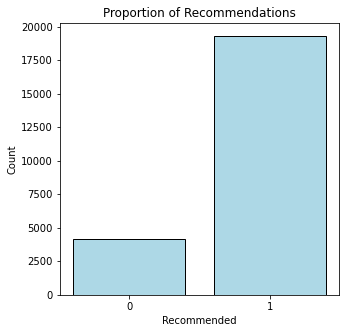

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))

value_counts = data["Recommended IND"].value_counts()
plt.bar(value_counts.index, value_counts.values, color='lightblue', edgecolor='black')

plt.xticks([0, 1])
plt.xlabel("Recommended")
plt.ylabel("Count")
plt.title("Proportion of Recommendations")

plt.show()

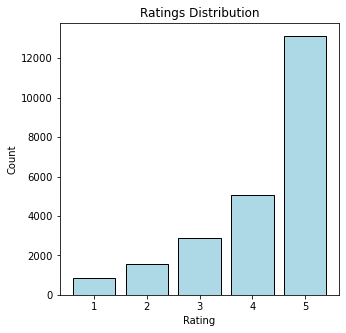

In [8]:
plt.figure(figsize=(5,5))
rating_value_counts = data.Rating.value_counts()

plt.bar(rating_value_counts.index, rating_value_counts.values, color='lightblue', edgecolor='black')

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Ratings Distribution")

plt.show()

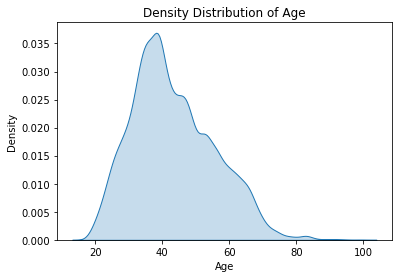

In [9]:
import seaborn as sns
sns.kdeplot(data=data['Age'], shade=True)
plt.title("Density Distribution of Age")
plt.show()

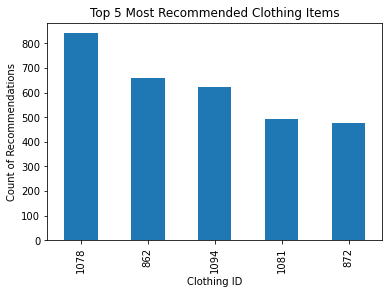

In [10]:
df_grouped = data.groupby("Clothing ID")["Recommended IND"].sum()

top_5 = df_grouped.sort_values(ascending=False).head(5)

# Plot a bar chart of the top 5 items
df_grouped.sort_values(ascending=False).head(5).plot.bar()

plt.title("Top 5 Most Recommended Clothing Items")
plt.xlabel("Clothing ID")
plt.ylabel("Count of Recommendations")
plt.show()

**Clothing ID no. 1078 is the most recommended Clothing Item**

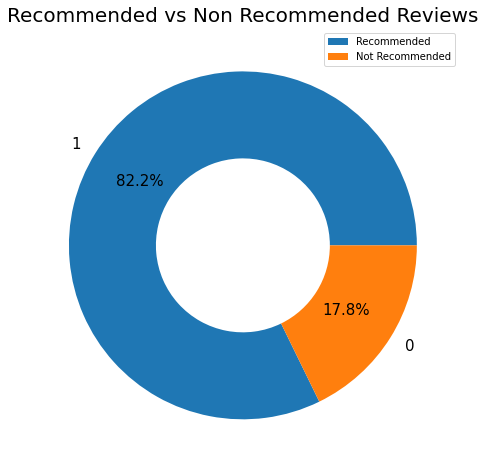

In [11]:
plt.figure(figsize=(14,8))
data['Recommended IND'].value_counts().plot.pie(autopct='%1.1f%%', pctdistance=0.7, wedgeprops=dict(width=0.5), fontsize = 15)
plt.title('Recommended vs Non Recommended Reviews', fontsize = 20)
plt.legend(['Recommended', 'Not Recommended'])
plt.ylabel(" ")
plt.show()

**82.2% of the total products are being recommended by people**

In [12]:
recomm = data.groupby('Department Name')['Recommended IND'].agg(['sum', 'count'])
recomm['Average Recommended IND'] = recomm['sum'] / recomm['count']

In [13]:
recomm = recomm[['Average Recommended IND']]
recomm.columns = ['Recommended IND average']

In [14]:
recomm = recomm.reset_index()

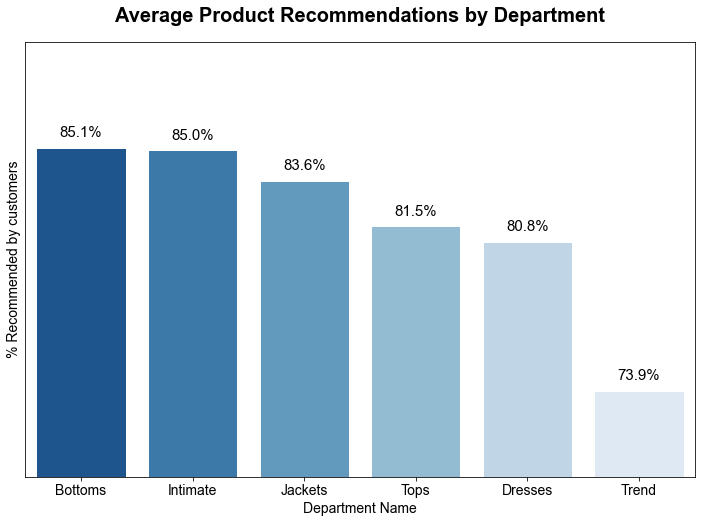

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_style('white')
colors = sns.color_palette('Blues', len(recomm))[::-1]
recomm_sorted = recomm.sort_values('Recommended IND average', ascending = False)
ax = sns.barplot(x='Department Name', y='Recommended IND average', data=recomm_sorted, palette=colors)
ax.set_ylim([0.7, 0.9])


ax.set_title('Average Product Recommendations by Department', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Department Name', fontsize = 14)
ax.set_ylabel('% Recommended by customers', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_yticks([])

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.005, '{:.1%}'.format(height), ha="center", fontsize=15, color='black')

plt.show()


**On an average bottoms, Intimate and Jackets are most recommended by customers**

## Making age bins 18-40, 40-60 and 60 plus to analyse rating trends

In [16]:
data['Age Group'] = pd.cut(data['Age'], bins=[18, 40, 60, 100], labels=['18-40', '41-60', '60+'])

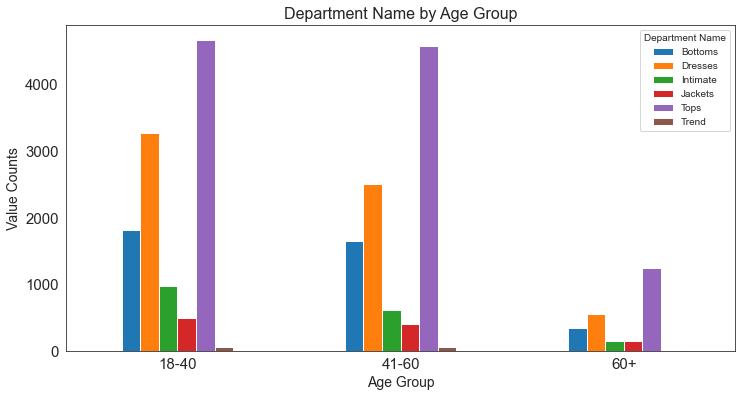

In [17]:
grouped_data = data.groupby('Age Group')['Department Name'].value_counts().unstack()
grouped_data.plot(kind='bar', stacked=False,figsize=(12,6), fontsize = 15)

plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Value Counts', fontsize=14)
plt.title('Department Name by Age Group', fontsize=16)
plt.xticks(rotation=0)
plt.show()

## Analysing the reviews which are <= 2

In [18]:
result = data.groupby('Department Name')['Rating'].apply(lambda x: (x <= 2).mean() * 100).reset_index(name='% of ratings <= 2')

In [19]:
result.sort_values(by = '% of ratings <= 2', inplace = True)

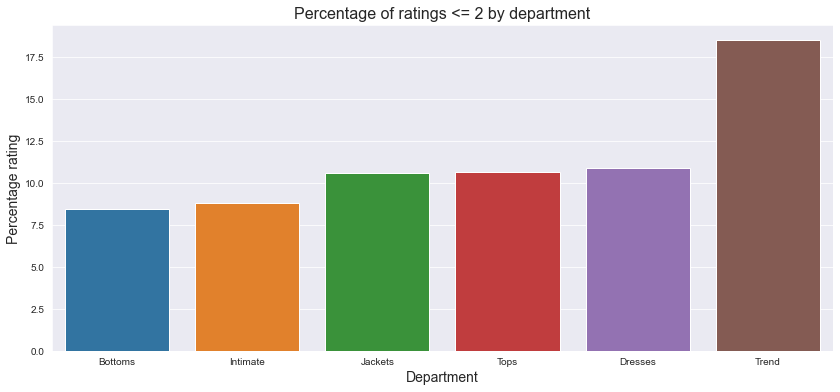

In [20]:
plt.figure(figsize=(14,6))
sns.set_style("darkgrid")
ax = sns.barplot(x='Department Name', y='% of ratings <= 2', data=result)
ax.set_title('Percentage of ratings <= 2 by department', fontsize=16)
ax.set_xlabel('Department', fontsize=14)
ax.set_ylabel('Percentage rating', fontsize=14)
plt.show()

**We can infer that around 17.5% of the Trend category has recieved less that 2 rating on a scale of 5.**

## Let us find which department has highest average ratings

In [21]:
highest_rating = data.groupby('Department Name')['Rating'].mean().sort_values().reset_index(name = 'Ratings')

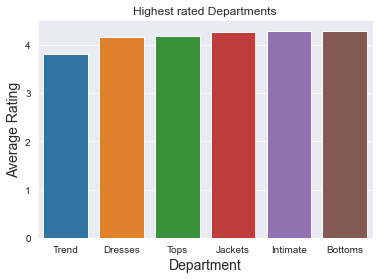

In [22]:
ax = sns.barplot(x='Department Name', y='Ratings', data=highest_rating)
ax.set_title('Highest rated Departments')
ax.set_xlabel('Department', fontsize=14)
ax.set_ylabel('Average Rating', fontsize=14)
plt.show()

**There almost a tie between Jackets, Intimate abd Bottoms section. That means people were statisfied with these particular categories.**

## Correlation Matrix

In [23]:
df1=data.copy()

# Convert categorical variables to numerical
df1["Class Name"] = df1["Class Name"].astype("category").cat.codes
df1["Review Text"] = df1["Review Text"].astype("category").cat.codes

# Normalize the numerical columns
df1["Rating"] = (df1["Rating"] - df1["Rating"].min()) / (df1["Rating"].max() - df1["Rating"].min())

# Create additional features
df1["Review Length"] = df1["Review Text"].fillna("").astype(str).apply(len)
df1.head(2)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group,Review Length
0,767,33,,246,0.75,1,0,Initmates,Intimate,5,18-40,3
1,1080,34,,13178,1.00,1,4,General,Dresses,3,18-40,5


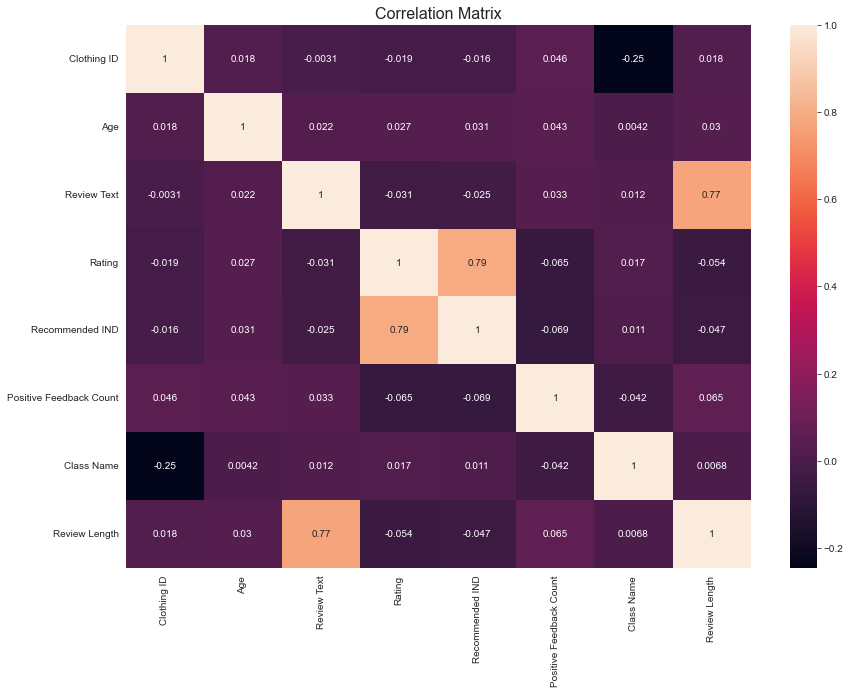

In [24]:
plt.figure(figsize=(14,10))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [25]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


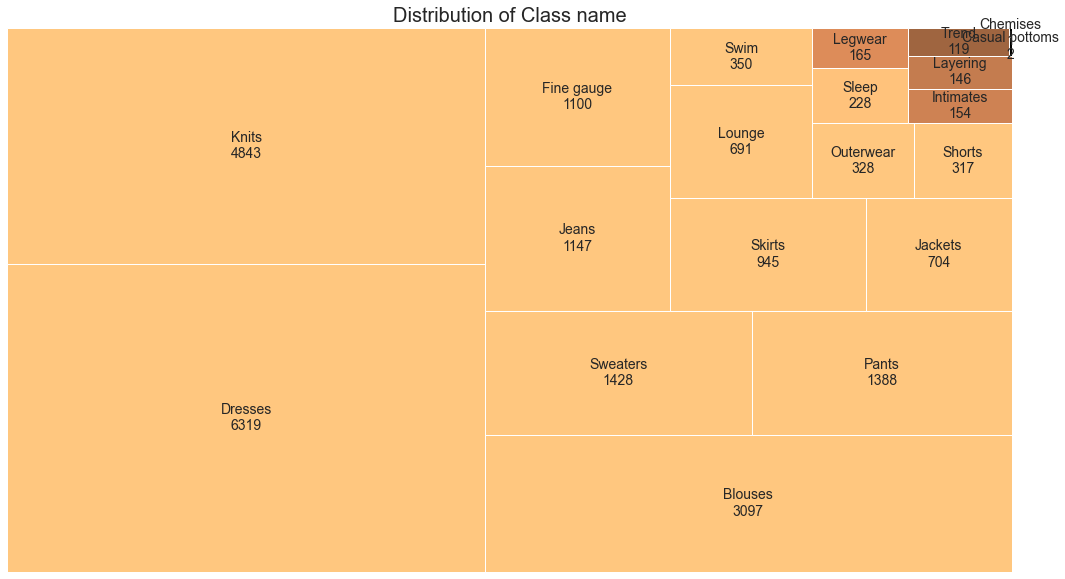

In [26]:
import squarify
plt.figure(figsize=(18,10))
counts = data['Class Name'].value_counts()

# Normalize the counts to percentages
sizes = (counts / counts.sum()) * 100

# Define the color map for the tree map
cmap = plt.cm.get_cmap('copper')

# Generate the tree map using the squarify library
squarify.plot(sizes=sizes, label=[f"{c}\n{n}" for c, n in zip(counts.index,counts)], color=cmap(sizes) ,text_kwargs={'fontsize': 14})

plt.title('Distribution of Class name', fontsize = 20)
plt.axis('off')

plt.show()

## Text Analysis

In [27]:
import nltk
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshayjain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
data_review_positive = data.loc[data['Rating'] >= 4, 'Review Text'].dropna().to_list()
data_review_negative = data.loc[data['Rating'] <= 2, 'Review Text'].dropna().to_list()

In [29]:
stop_words = stopwords.words('english')
def preprocess_titles(data):
    title = [gensim.utils.simple_preprocess(i) for i in data]
    flattened_list = [item for sublist in title for item in sublist]
    clean_data = [i for i in flattened_list if i not in stop_words]
    return clean_data

## Word Cloud for Review Title

In [30]:
positive_clean = preprocess_titles(data_review_positive)

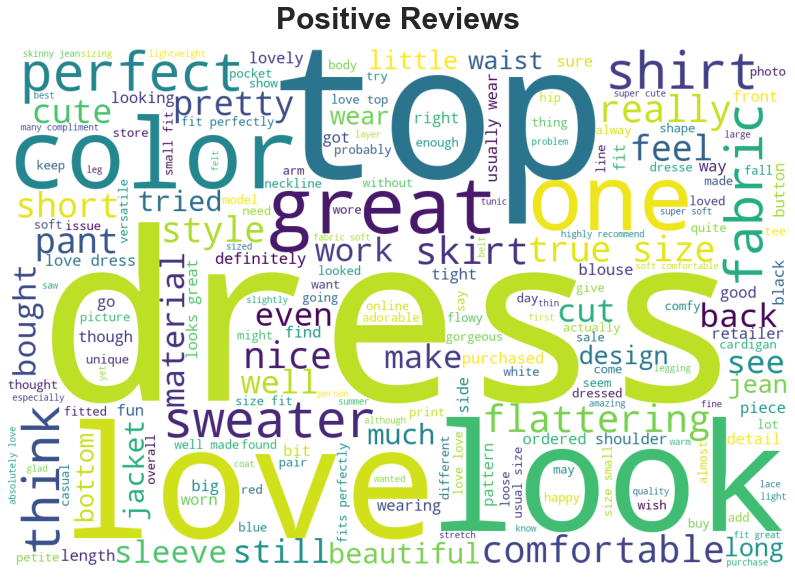

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(positive_clean)
wordcloud = WordCloud(width=1200, height=800,
                      background_color='white',
                      min_font_size=8,max_words=200).generate(text)

plt.figure(figsize=(14, 14), facecolor=None)
plt.imshow(wordcloud)
plt.title('Positive Reviews', fontsize=30, fontweight='bold', pad=20)
plt.axis('off')
plt.show()

## Word Cloud for Reviews

In [32]:
negative_clean = preprocess_titles(data_review_negative)

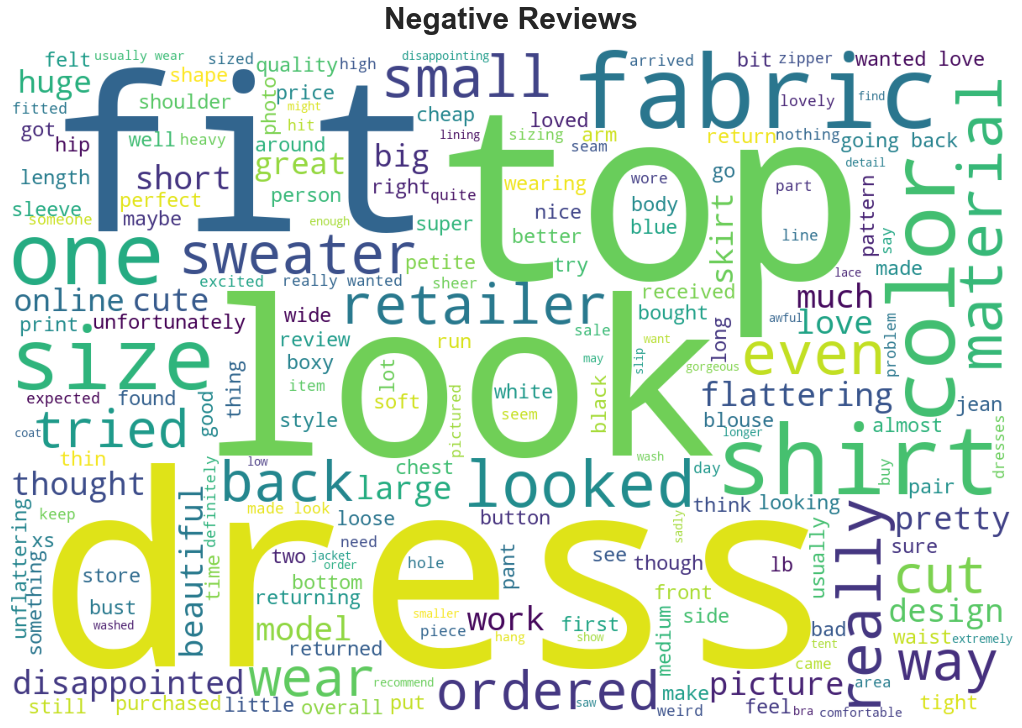

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(negative_clean)
wordcloud = WordCloud(width=1200, height=800,
                      background_color='white',
                      min_font_size=8, max_words = 200).generate(text)

plt.figure(figsize=(14,14), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Negative Reviews', fontsize=30, fontweight='bold', pad=20)
plt.tight_layout(pad=0)
plt.show()

## Let's see how is the polarity of the reviews

In [34]:
def review_word(text):
    words = gensim.utils.simple_preprocess(text)
    words = [i for i in words if i not in stop_words]
    return words

In [35]:
data['Review Words'] = data['Review Text'].apply(review_word)

In [36]:
from textblob import TextBlob
def calculate_polarity(text):
    words = ' '.join(text)
    blob = TextBlob(words)
    return blob.sentiment.polarity

In [37]:
data['Review Polarity'] = data['Review Words'].apply(calculate_polarity)

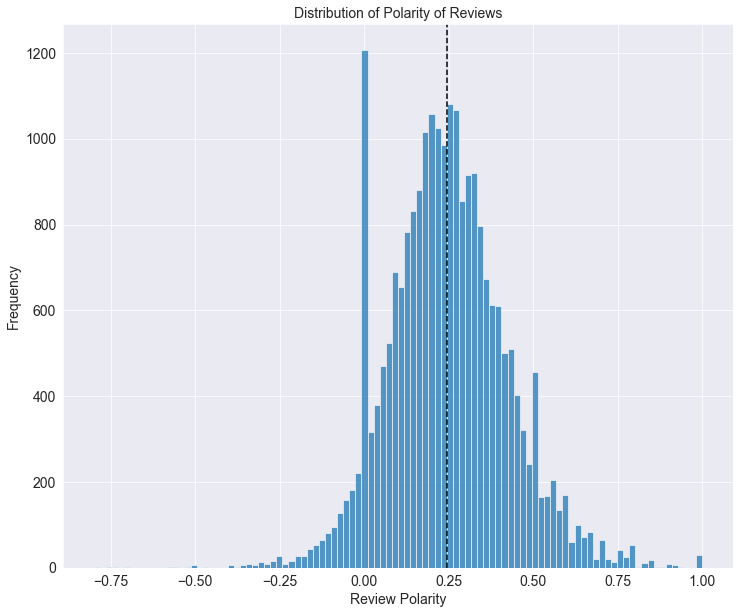

In [38]:
plt.figure(figsize=(12, 10))
sns.histplot(data['Review Polarity'], bins=100)
mean = data['Review Polarity'].mean()
plt.axvline(x=mean, color='black', linestyle='--')
plt.title('Distribution of Polarity of Reviews', fontsize=14)
plt.xlabel('Review Polarity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [39]:
data['Review Length'] = data['Review Text'].astype(str).apply(len)
data.tail()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group,Review Words,Review Polarity,Review Length
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,18-40,"[happy, snag, dress, great, price, easy, slip,...",0.677778,131
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,41-60,"[reminds, maternity, clothes, soft, stretchy, ...",0.191667,223
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,18-40,"[fit, well, top, see, never, would, worked, gl...",0.450000,208
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,18-40,"[bought, dress, wedding, summer, cute, unfortu...",0.418750,427
23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses,41-60,"[dress, lovely, platinum, feminine, fits, perf...",0.364444,110


# Topic Modeling

In [40]:
import gensim
from gensim import corpora, models
dictionary = corpora.Dictionary(data['Review Words'])

In [41]:
bow_corpus = [dictionary.doc2bow(doc) for doc in data['Review Words']]

In [42]:
lda_model = gensim.models.ldamodel.LdaModel(bow_corpus, num_topics=3, id2word=dictionary, passes=10)

In [43]:
data.tail()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group,Review Words,Review Polarity,Review Length
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,18-40,"[happy, snag, dress, great, price, easy, slip,...",0.677778,131
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,41-60,"[reminds, maternity, clothes, soft, stretchy, ...",0.191667,223
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,18-40,"[fit, well, top, see, never, would, worked, gl...",0.450000,208
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,18-40,"[bought, dress, wedding, summer, cute, unfortu...",0.418750,427
23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses,41-60,"[dress, lovely, platinum, feminine, fits, perf...",0.364444,110


In [44]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.021*"dress" + 0.015*"like" + 0.011*"fabric" + 0.010*"back" + 0.010*"top" + 0.009*"one" + 0.008*"would" + 0.008*"online" + 0.007*"store" + 0.007*"much"
Topic: 1 
Words: 0.029*"size" + 0.018*"small" + 0.017*"fit" + 0.017*"dress" + 0.014*"top" + 0.012*"like" + 0.012*"would" + 0.011*"ordered" + 0.011*"large" + 0.009*"petite"
Topic: 2 
Words: 0.029*"love" + 0.024*"great" + 0.019*"wear" + 0.014*"perfect" + 0.013*"comfortable" + 0.013*"soft" + 0.012*"jeans" + 0.012*"color" + 0.011*"fit" + 0.011*"bought"


In [45]:
topic_data = []
for i, row in enumerate(lda_model[bow_corpus]):
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    for j, (topic_num, prop_topic) in enumerate(row):
        if j == 0:
            wp = lda_model.show_topic(topic_num)
            topic_keywords = ", ".join([word for word, prop in wp])
            topic_data.append({'Document_No': i, 'Dominant_Topic': topic_num, 
                               'Topic_Perc_Contrib': round(prop_topic, 4), 
                               'Keywords': topic_keywords, 
                               'Text': data['Review Words'][i]})

In [46]:
df_topic_sents_keywords = pd.DataFrame(topic_data)

In [47]:
df_topic_sents_keywords = df_topic_sents_keywords.sort_values(by = ['Document_No'])

In [48]:
df_topic_sents_keywords

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2,0.8807,"love, great, wear, perfect, comfortable, soft,...","[absolutely, wonderful, silky, sexy, comfortable]"
1,1,1,0.8377,"size, small, fit, dress, top, like, would, ord...","[love, dress, sooo, pretty, happened, find, st..."
2,2,1,0.6279,"size, small, fit, dress, top, like, would, ord...","[high, hopes, dress, really, wanted, work, ini..."
3,3,2,0.8676,"love, great, wear, perfect, comfortable, soft,...","[love, love, love, jumpsuit, fun, flirty, fabu..."
4,4,2,0.7453,"love, great, wear, perfect, comfortable, soft,...","[shirt, flattering, due, adjustable, front, ti..."
...,...,...,...,...,...
23481,23481,2,0.5284,"love, great, wear, perfect, comfortable, soft,...","[happy, snag, dress, great, price, easy, slip,..."
23482,23482,1,0.6497,"size, small, fit, dress, top, like, would, ord...","[reminds, maternity, clothes, soft, stretchy, ..."
23483,23483,1,0.6613,"size, small, fit, dress, top, like, would, ord...","[fit, well, top, see, never, would, worked, gl..."
23484,23484,1,0.5089,"size, small, fit, dress, top, like, would, ord...","[bought, dress, wedding, summer, cute, unfortu..."


In [49]:
df_topic_sents_keywords['Keywords'].unique()

array(['love, great, wear, perfect, comfortable, soft, jeans, color, fit, bought',
       'size, small, fit, dress, top, like, would, ordered, large, petite',
       'dress, like, fabric, back, top, one, would, online, store, much'],
      dtype=object)

In [56]:
##Assigning the names to the topics "Product Feel", "Appearance", "Dress sizing and fitting"
df_topic_sents_keywords["Topic_Name"] = df_topic_sents_keywords["Dominant_Topic"].replace([2, 0, 1], ["Product Feel", "Online Shopping", "Dress sizing and fitting"])

## The major three topics from the reviews are about 
1. **Product Feel** 
2. **Online shopping**
3. **Dress sizing and fitting**

In [57]:
df_topic_sents_keywords.tail()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Topic_Name
23481,23481,2,0.5284,"love, great, wear, perfect, comfortable, soft,...","[happy, snag, dress, great, price, easy, slip,...",Product Feel
23482,23482,1,0.6497,"size, small, fit, dress, top, like, would, ord...","[reminds, maternity, clothes, soft, stretchy, ...",Dress sizing and fitting
23483,23483,1,0.6613,"size, small, fit, dress, top, like, would, ord...","[fit, well, top, see, never, would, worked, gl...",Dress sizing and fitting
23484,23484,1,0.5089,"size, small, fit, dress, top, like, would, ord...","[bought, dress, wedding, summer, cute, unfortu...",Dress sizing and fitting
23485,23485,2,0.9405,"love, great, wear, perfect, comfortable, soft,...","[dress, lovely, platinum, feminine, fits, perf...",Product Feel


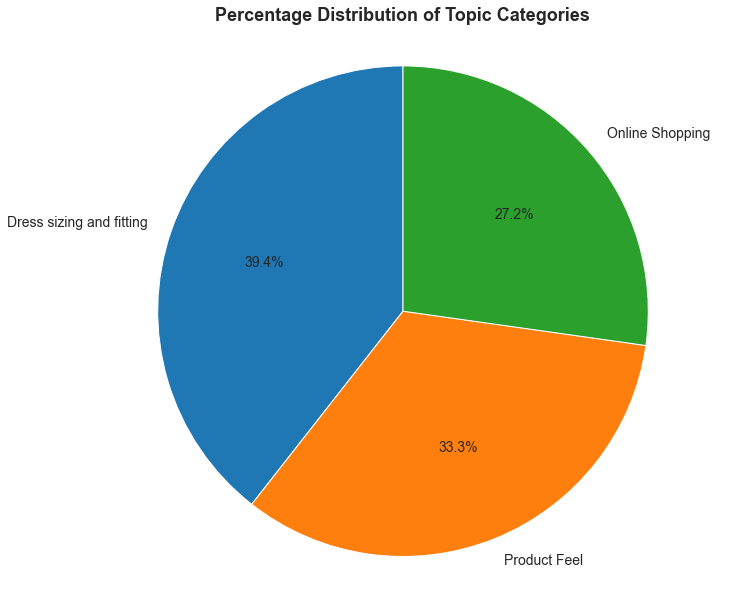

In [58]:
topic_counts = df_topic_sents_keywords['Topic_Name'].value_counts()

plt.figure(figsize=(12, 10))
plt.pie(topic_counts.values, labels=topic_counts.index.values, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.axis('equal')
plt.title('Percentage Distribution of Topic Categories',fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [59]:
data = data.reset_index()
df = data.merge(df_topic_sents_keywords, left_on='index', right_on='Document_No')
df = df[['Clothing ID','Age Group','Rating','Recommended IND','Topic_Name','Review Polarity','Review Length','Department Name']]

In [60]:
counts = df.groupby('Clothing ID').size().reset_index(name='Sales') ## how many times a clothing ID has appeared
df = pd.merge(df, counts, on='Clothing ID', how='left')

**As then Trend department is least recommended we list the topics related to it** 

In [61]:
df[(df['Rating'] <= 2) & (df['Department Name'] == "Trend")]['Topic_Name'].value_counts()

Online Shopping             11
Dress sizing and fitting    10
Product Feel                 1
Name: Topic_Name, dtype: int64

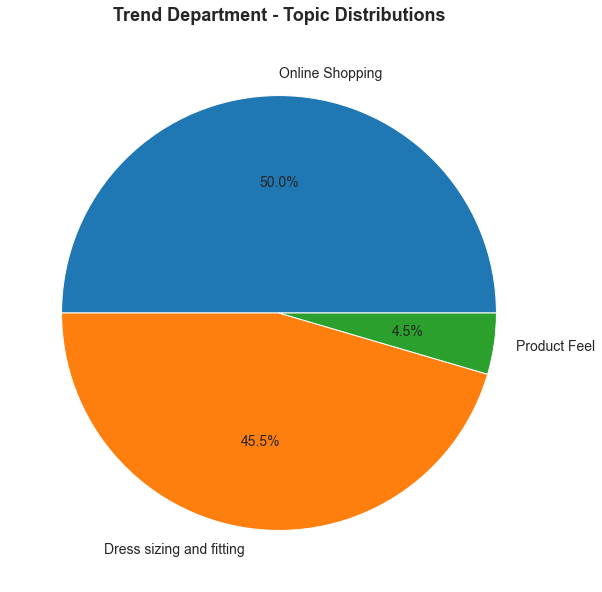

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
trend_topics = df[(df['Rating'] <= 2) & (df['Department Name'] == "Trend")]['Topic_Name'].value_counts()
plt.pie(trend_topics, labels=trend_topics.index, autopct='%1.1f%%',textprops={'fontsize': 14})
plt.title('Trend Department - Topic Distributions',fontsize=18, fontweight='bold', pad=20)
plt.show()

**It seems like people who shop "trend" category online have lots of sizing and fitting issues that's why they do not recommend the products and give low ratings for trend category**